# Projet 2 - Préparez des données pour un organisme de santé publique

In [1]:
import os
import glob
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Only keep the following columns :
# 7: product_name
# 53: nutrition_grade_fr
# 63: energy_100g
# 65: fat_100g
# 66: saturated-fat_100g
# 101: carbohydrates_100g
# 102: sugars_100g
# 112: proteins_100g
# 158: nutrition-score-fr_100g

cols_used = [7, 53, 63, 65, 66, 101, 102, 112, 158]

chunk_size = 20000
batch_no = 1

dtype_cols = {
    7: str,  
    53: str,
    63: float,
    65: float,
    66: float,
    101: float,
    102: float,
    112: float,
    158: float,
}

# if there are files in the chunks folder, delete them
files = glob.glob('data/chunks/*')
for f in files:
    os.remove(f)

# split the csv file into chunks and save them in the chunks folder for later use
for chunk in pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', chunksize=chunk_size, dtype=dtype_cols, usecols=cols_used):
    chunk.to_csv(f'data/chunks/fr.openfoodfacts.org.products_{batch_no:03d}.csv', index=False)
    batch_no += 1

In [2]:
# read the main csv file for processing
df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', dtype=dtype_cols, usecols=cols_used)

# Faire des analyses de distribution sur les colonnes

3 techniques pour nettoyer les données

- 3 methodes valeurs manquantes
Marin Bouthemy
11:31
- valeurs aberrantes: visuels mais aussi stats (par exmeple 95% percentile)
Marin Bouthemy
11:31
- boxplot

In [ ]:
# drop lines which have a missing nutrition_grade_fr
df = df.dropna(subset=['nutrition_grade_fr'])

# drop lines which have a missing carbohydrates_100g
df = df.dropna(subset=['carbohydrates_100g'])

# drop lines which have a missing sugars_100g
df = df.dropna(subset=['sugars_100g'])

# drop lines which have a missing proteins_100g
df = df.dropna(subset=['proteins_100g'])

# drop lines which have a missing nutrition-score-fr_100g
df = df.dropna(subset=['nutrition-score-fr_100g'])

# drop lines which have a missing energy_100g
df = df.dropna(subset=['energy_100g'])

# drop lines which have a missing fat_100g
df = df.dropna(subset=['fat_100g'])

# drop lines which have a missing saturated-fat_100g
df = df.dropna(subset=['saturated-fat_100g'])

In [4]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g
count,2.034730e+05,203473.000000,203473.000000,203473.000000,203473.000000,203473.000000,203473.000000
mean,1.196829e+03,13.351325,4.898302,33.216706,15.024579,7.754220,9.166862
std,7.258763e+03,16.114319,7.346032,28.309844,19.758715,7.983009,9.062696
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-3.570000,-15.000000
25%,4.520000e+02,0.880000,0.000000,7.000000,1.300000,2.000000,1.000000
50%,1.197000e+03,7.140000,1.790000,24.000000,5.000000,5.700000,10.000000
75%,1.724000e+03,21.430000,7.140000,59.000000,23.300000,10.710000,16.000000
max,3.251373e+06,380.000000,210.000000,190.000000,134.000000,100.000000,40.000000


In [5]:
df.sample(20)

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g
24978,Nutty Caramel Crunch Sundae Ice Cream,d,1100.0,12.03,7.52,34.59,25.56,4.51,15.0
109664,"Monet, Vegetable Entertainer Crackers",c,1954.0,20.00,0.00,66.67,6.67,6.67,8.0
166363,Raw Cacao Powder,c,1795.0,10.71,7.14,64.29,0.00,21.43,7.0
12847,Beef Bologna,e,1439.0,28.12,10.94,6.25,3.12,12.50,24.0
286851,NaN,b,730.0,8.00,1.00,12.00,0.60,13.00,2.0
104758,"Genesis, Organic Raw Juice, Cranberry Lemonade",b,209.0,0.00,0.00,12.50,11.67,0.00,2.0
16680,Extra Sharp Cheddar Cheese,e,1795.0,33.33,21.43,0.00,0.00,23.81,21.0
155359,"Harbor Farms, Kefir, Vanilla",c,351.0,3.54,1.77,15.04,15.04,3.54,3.0
125474,Hardwood Smoked Sliced Bacon,e,2510.0,46.67,16.67,0.00,0.00,33.33,27.0
216631,Sainte Maure,d,1231.0,25.00,18.00,0.00,0.00,18.00,14.0


In [6]:
df.shape

(203473, 9)

Nous obtenons un ensemble de 203473 observations et 9 variables. Nous pouvons maintenant commencer les analyses.

# Analyse univariée des colonnes

### nutrition_grade_fr

In [7]:

df['nutrition_grade_fr'].value_counts()

nutrition_grade_fr
d    57829
c    41826
e    39493
a    33144
b    31181
Name: count, dtype: int64

<Axes: xlabel='nutrition_grade_fr'>

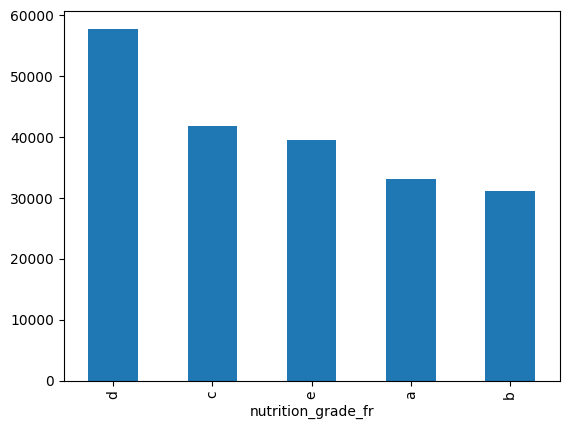

In [8]:
df['nutrition_grade_fr'].value_counts().plot.bar()

# Analyse multivariée : nuage de points

In [9]:
# Transform nutrition_grade_fr column to numeric
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5})

# drop the product_name column because it's useless for the model
df_without_name = df.drop(columns=['product_name'])





In [10]:
# correlation matrix
corr = df_without_name.corr()
corr

,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g
nutrition_grade_fr,1.000000,0.059041,0.531453,0.581342,0.228600,0.439499,0.094302,0.957489
energy_100g,0.059041,1.000000,0.079509,0.058154,0.057348,0.033923,0.033824,0.064570
fat_100g,0.531453,0.079509,1.000000,0.709885,-0.062439,-0.012228,0.256783,0.570324
saturated-fat_100g,0.581342,0.058154,0.709885,1.000000,-0.027630,0.123514,0.183059,0.640160
carbohydrates_100g,0.228600,0.057348,-0.062439,-0.027630,1.000000,0.640910,-0.130154,0.263336
sugars_100g,0.439499,0.033923,-0.012228,0.123514,0.640910,1.000000,-0.268626,0.475227
proteins_100g,0.094302,0.033824,0.256783,0.183059,-0.130154,-0.268626,1.000000,0.109766
nutrition-score-fr_100g,0.957489,0.064570,0.570324,0.640160,0.263336,0.475227,0.109766,1.000000


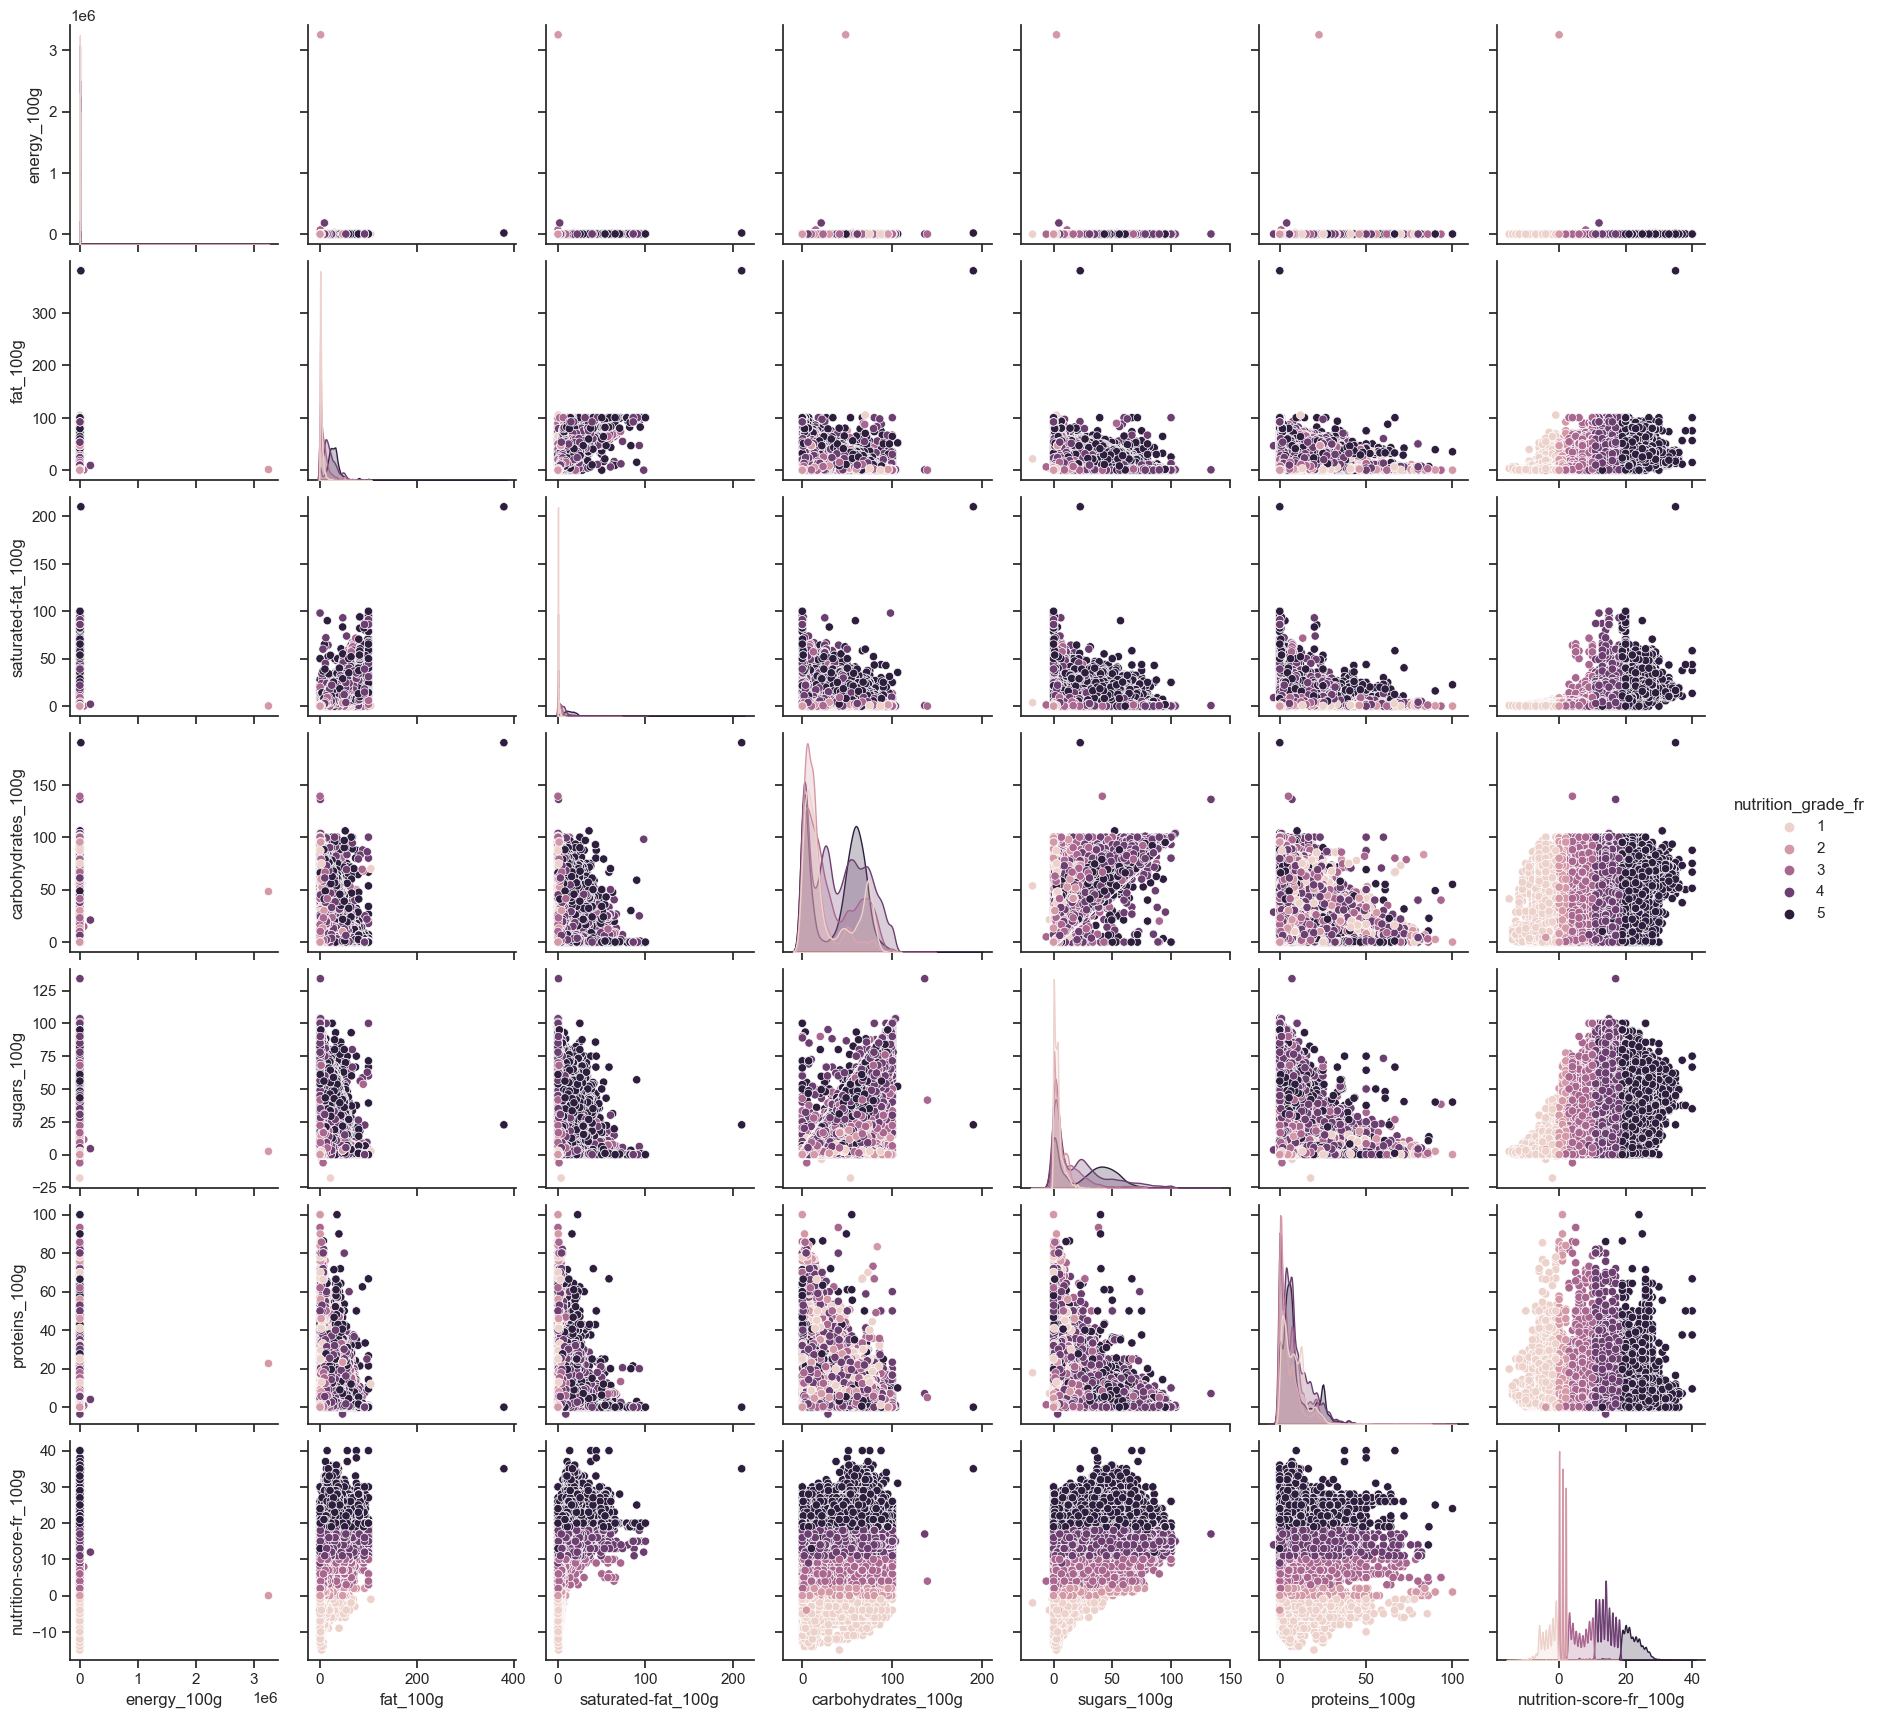

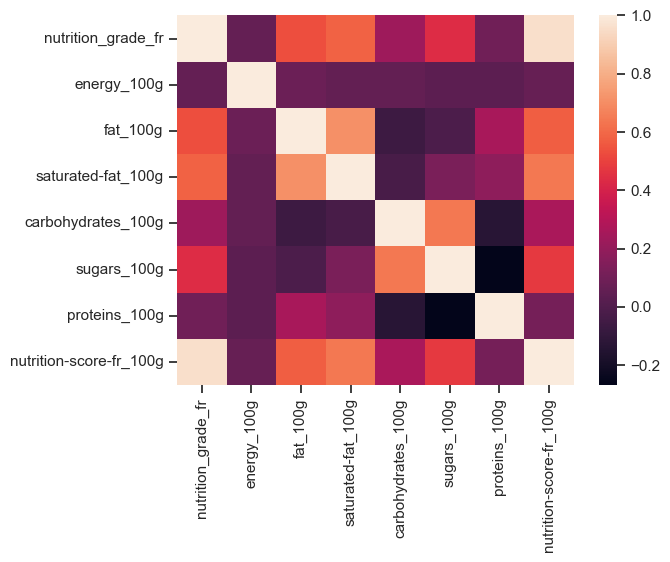

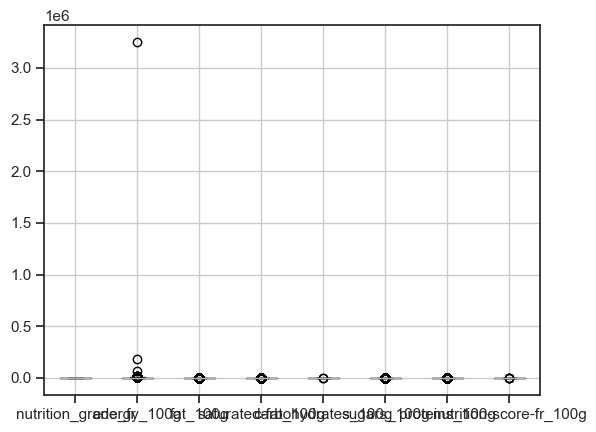

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# pairplot
sns.pairplot(df_without_name, hue="nutrition_grade_fr")

# heatmap
plt.figure()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# boxplot
plt.figure()
df_without_name.boxplot()
plt.show()



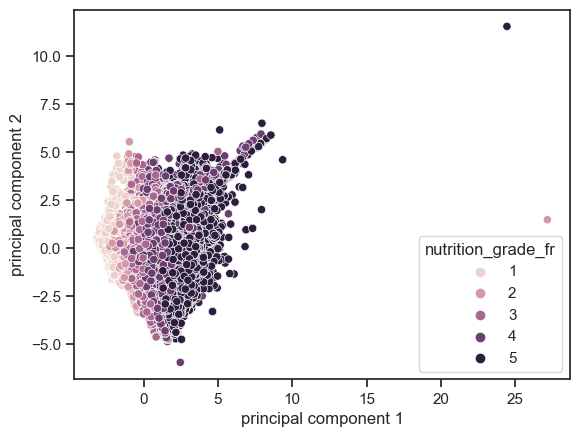

In [12]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_without_name soit votre DataFrame

# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_without_name)

# Application de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Création d'un DataFrame pour le résultat de PCA
pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2'])

# Ajout de la colonne 'nutrition_grade_fr' au DataFrame PCA
pca_df['nutrition_grade_fr'] = df_without_name['nutrition_grade_fr'].reset_index(drop=True)

# Visualisation
plt.figure()
sns.scatterplot(x='principal component 1', y='principal component 2', hue='nutrition_grade_fr', data=pca_df)
plt.show()


In [13]:
import numpy as np

# Effectuer PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Scores pour le graphique
xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca_result[:, 0]
ys = pca_result[:, 1]

# Créer le biplot
plt.figure()
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.02)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df_without_name.columns.values)[i], color='r')

for i in range(len(xs)):
    plt.scatter(xs[i], ys[i], c='b')
    
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000022B8AF56440> (for post_execute):


KeyboardInterrupt: 

continuer sur analyse bivariee
Marin Bouthemy
11:32
(PCA: regarder le cours) pour voir la methode du coude, le cercle des visualisations, les compoentns principales


On pourra voir ensemble la semaine pro les tests stats